<a href="https://colab.research.google.com/github/PrajwalPPatil/IrisDataset_ML/blob/main/IrisData_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Load Dataset
data = pd.read_excel('/content/Testdataset2.xlsx')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,NaN,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Display First few rows
print('First Few Rows of Dataset: ')
print(data.head())

First Few Rows of Dataset: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            NaN           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Data Types of Columns
print("\nData Types of Each Columns: ")
print(data.dtypes)



Data Types of Each Columns: 
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:
# Check for Missing Values
print("\nMissing Values in Dataset: ")
print(data.isnull().sum())


Missing Values in Dataset: 
Id                0
SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64


**Data Cleaning**

In [ ]:
# Handle Missing Values
data = data.dropna()  # Drop rows with missing values

In [ ]:
# Convert Categorical 'Species' column to numerical values
label_encoder = LabelEncoder()
data['Species']=label_encoder.fit_transform(data['Species'])

<ipython-input-12-18f4710f41d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species']=label_encoder.fit_transform(data['Species'])


**EDA**

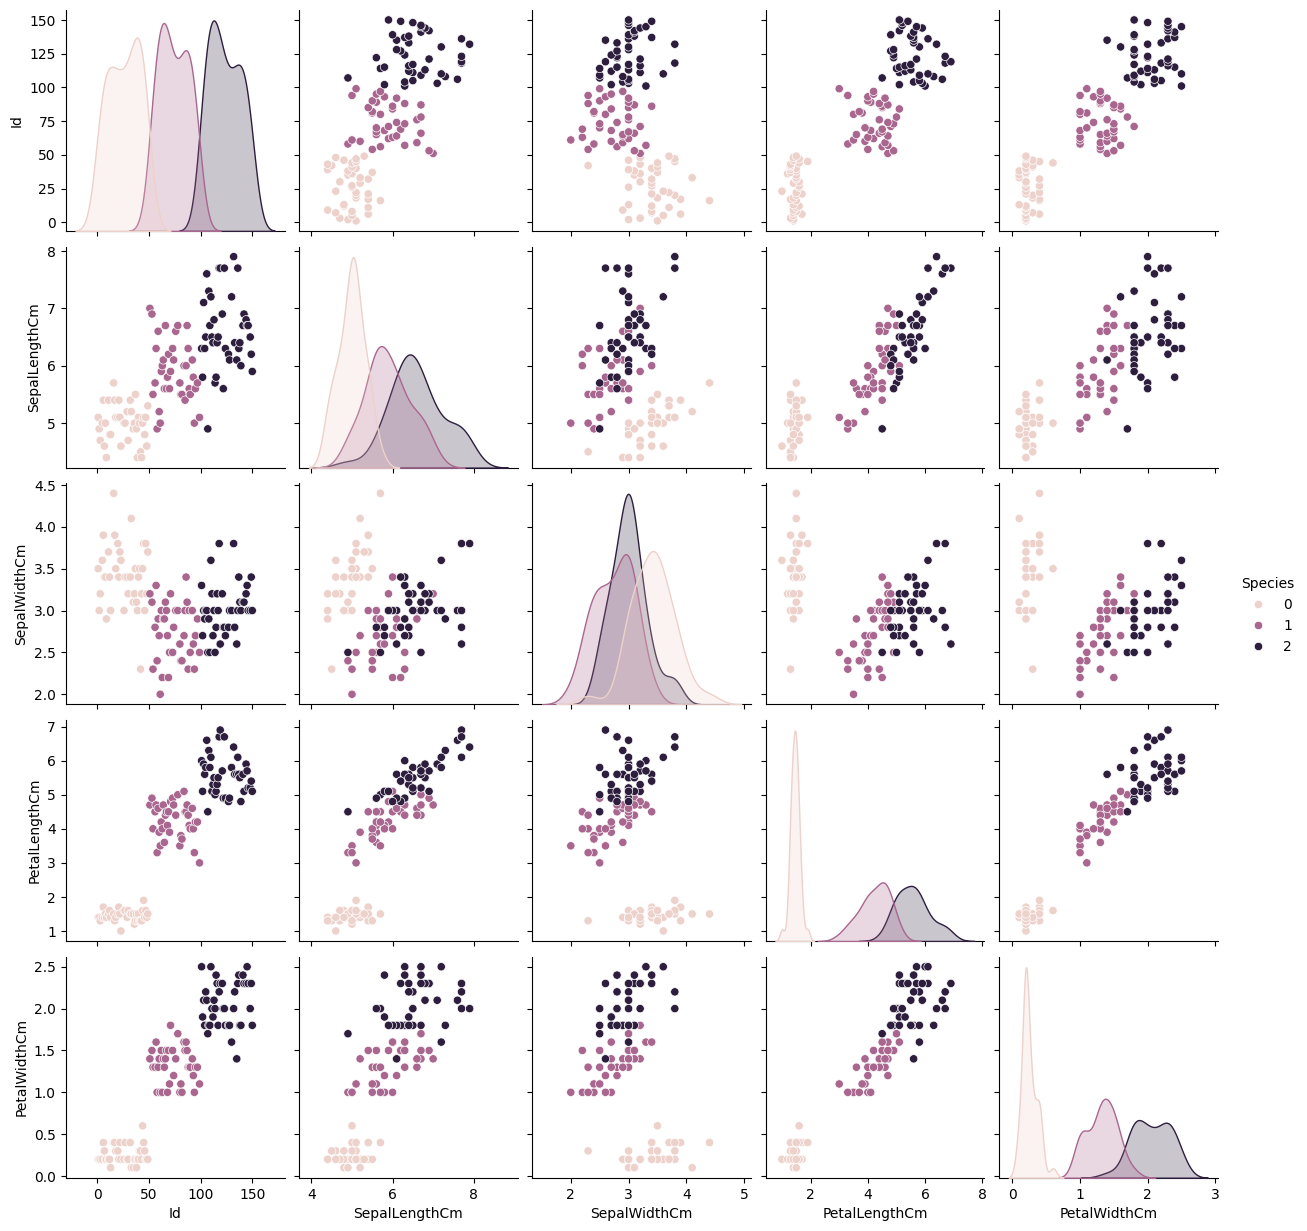

In [ ]:
# EDA
sns.pairplot(data,hue='Species')
plt.show()

**Model Building**

In [ ]:
# Split Dataset into training and testing sets
X=data.drop(columns=['Species'])
y=data['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4


In [ ]:
y.head()

,Species
0,0
1,0
2,0
4,0
5,0


In [ ]:
# Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make Predictions
y_pred=model.predict(X_test)

In [ ]:
# Confusion matrix & Performance matrix
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

In [ ]:
# Display Result
print("\nConfusion Matrix: ")
print(cm)
print("\nAccuracy: ",acc)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ", f1)


Confusion Matrix: 
[[7 0 0]
 [0 8 0]
 [0 0 9]]

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


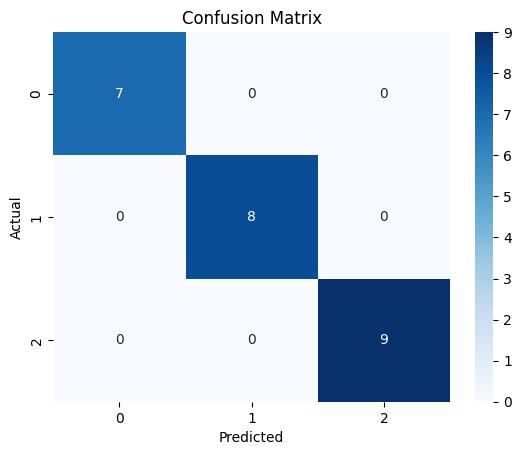

In [ ]:
# Heatmap for Confusion Matrix
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()